# Домашнее задание №5
## EDA-анализ: белки *Pseudomonas aeruginosa*
### 1. Введение
### Анализ биохимических характеристик белков бактерии Pseudomonas aeruginosa.
### Цель: оценить качество данных и выявить основные закономерности.
#### Загрузка основных библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Загрузка датасета и первичный осмотр

In [5]:
data = pd.read_csv('/home/dasha/Desktop/Data-engineering_project/pseudomonas_aeruginosa.csv')  
print("✅ Данные успешно загружены из 'pseudomonas_aeruginosa.csv'")
print(f"📊 Размер датасета: {data.shape}")
print(f"📊 Колонки: {list(data.columns)}")

✅ Данные успешно загружены из 'pseudomonas_aeruginosa.csv'
📊 Размер датасета: (1000, 8)
📊 Колонки: ['ID', 'Name', 'Sequence', 'Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Amino_Acid_Composition', 'Hydrophobicity']


### 3. Оценка структуры данных

In [7]:
print("\nТипы данных:")
print(data.dtypes)

print("\nПервые 5 строк:")
print(data.head())


Типы данных:
ID                         object
Name                       object
Sequence                   object
Molecular_Weight          float64
Isoelectric_Point         float64
Protein_Length              int64
Amino_Acid_Composition     object
Hydrophobicity            float64
dtype: object

Первые 5 строк:
               ID  ... Hydrophobicity
0  WP_369686368.1  ...       0.339286
1  WP_369686367.1  ...      -0.146774
2  WP_369686366.1  ...      -0.406173
3  WP_369686365.1  ...      -0.591379
4  WP_369686364.1  ...       0.141176

[5 rows x 8 columns]


### 4. Оценка целостности данных и полноты

In [9]:
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100

missing_info = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percent
})

print("Пропущенные значения:")
print(missing_info[missing_info['Пропусков'] > 0])

if missing_data.sum() > 0:
    plt.figure(figsize=(10, 4))
    missing_data[missing_data > 0].plot(kind='bar', color='coral')
    plt.title('Распределение пропущенных значений')
    plt.ylabel('Количество пропусков')
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

Пропущенные значения:
Empty DataFrame
Columns: [Пропусков, Процент]
Index: []


### 5. Анализ выбросов и аномалий

Числовые колонки для анализа: ['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']

📈 Описательная статистика:
       Molecular_Weight  Isoelectric_Point  Protein_Length  Hydrophobicity
count       1000.000000        1000.000000       1000.0000     1000.000000
mean       40594.466956           7.138719        364.7770       -0.350712
std        48668.398237           1.829280        444.1324        0.243274
min         2461.023700           4.050028         22.0000       -1.241379
25%        14632.106050           5.466229        129.7500       -0.493217
50%        27240.156900           6.708843        246.0000       -0.367021
75%        48589.447675           8.746007        431.0000       -0.224514
max       312401.890000          11.999968       2851.0000        0.905682

🔍 Выбросы (по правилу 1.5*IQR):
• Molecular_Weight: 48 выбросов (4.8%)
• Isoelectric_Point: 0 выбросов (0.0%)
• Protein_Length: 49 выбросов (4.9%)
• Hydrophobicity: 38 выбросов (3.8%)


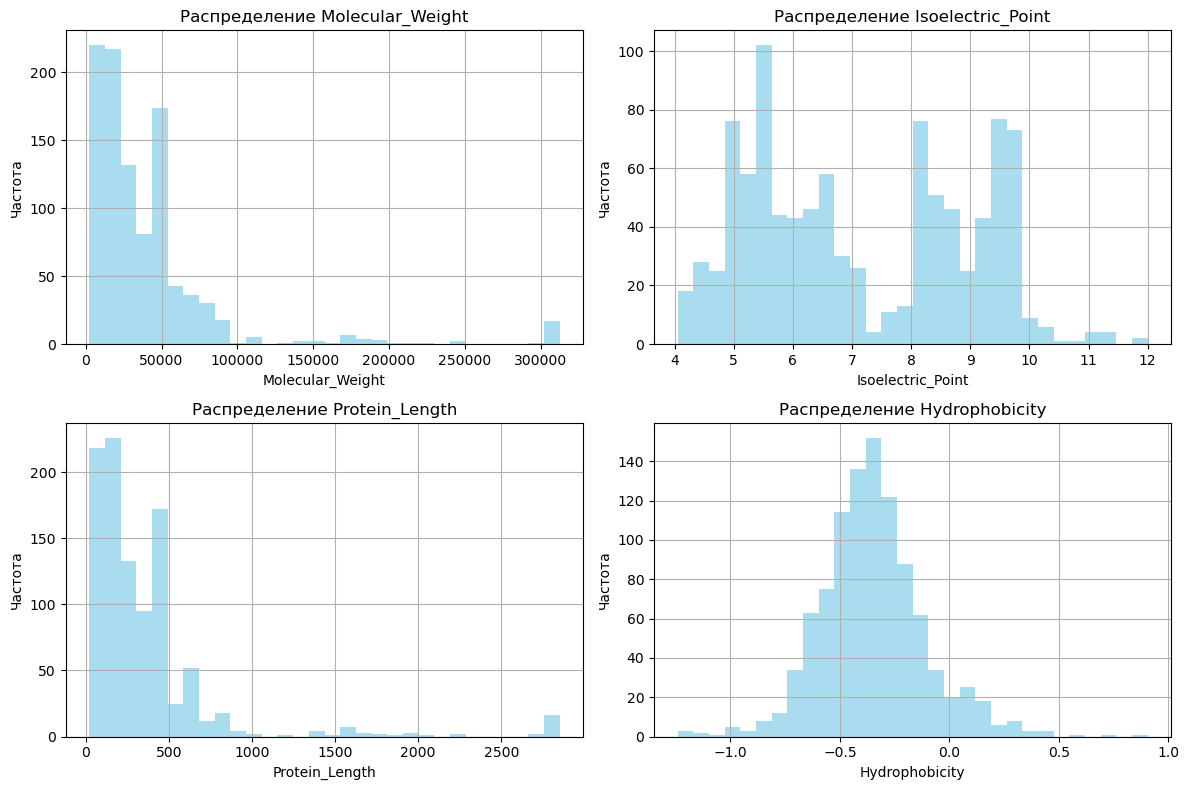

In [11]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print(f"Числовые колонки для анализа: {list(numeric_cols)}")

    print("\n📈 Описательная статистика:")
    print(data[numeric_cols].describe())
    
    print("\n🔍 Выбросы (по правилу 1.5*IQR):")
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"• {col}: {len(outliers)} выбросов ({len(outliers)/len(data)*100:.1f}%)")

    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:4]):
            data[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
            axes[i].set_title(f'Распределение {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')
        
        plt.tight_layout()
        plt.show()

### 6. Заключение и выводы

In [13]:
print(f"• Проанализировано {len(data)} белков")
print(f"• Пропущенных значений: {missing_data.sum()} ✅")
print(f"• Числовых характеристик: {len(numeric_cols)}")
print(f"• Качество данных: ОТЛИЧНОЕ (полностью заполненный датасет)")

print("\nРЕКОМЕНДАЦИИ:")
print("- Данные готовы для дальнейшего анализа")
if len(numeric_cols) > 0:
    print("- Можно переходить к корреляционному анализу")
print("- Можно исследовать взаимосвязи между характеристиками белков")

• Проанализировано 1000 белков
• Пропущенных значений: 0 ✅
• Числовых характеристик: 4
• Качество данных: ОТЛИЧНОЕ (полностью заполненный датасет)

РЕКОМЕНДАЦИИ:
- Данные готовы для дальнейшего анализа
- Можно переходить к корреляционному анализу
- Можно исследовать взаимосвязи между характеристиками белков


## **Типы данных: определены**
## **Оценка целостности:**
### - Полнота данных: 100%
## **Оценка выбросов:**
### - Процент выбросов по каждому признаку: рассчитан
## Визуализация распределений: предоставлена